In [1]:
%pylab inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.util import add_cyclic_point
import matplotlib.patches as mpatches
import matplotlib.path as mpath
from matplotlib.patches import Polygon
import cmocean.cm as cmo
import gsw

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

Populating the interactive namespace from numpy and matplotlib


In [2]:
savefig = True
figext = '.pdf'
datadir = '/Users/erik/Desktop/'

def savefig(fignum, figext=figext, savefig=savefig):
    figname = 'Fig%s%s' % (fignum, figext)
    if savefig:
        plt.savefig(figname)

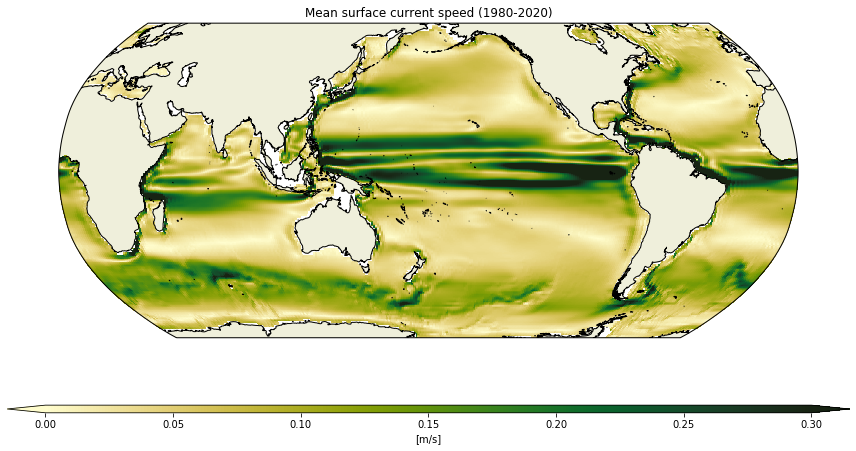

In [3]:
fignum = '04_02'
U = xr.open_mfdataset(datadir+'GODAS/ucur*', combine='by_coords')
V = xr.open_mfdataset(datadir+'GODAS/vcur*', combine='by_coords')
spd = np.hypot(U.ucur.isel(level=0).mean('time'), V.vcur.isel(level=0).mean('time'))

projection = cartopy.crs.Robinson(central_longitude=180)
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection}, figsize=(12, 7))
ax.coastlines(resolution='50m')
ax.add_feature(cartopy.feature.LAND)

a = spd.plot(cmap=cmo.speed, vmin=0, vmax=0.3, add_colorbar=False,
             transform=cartopy.crs.PlateCarree())
plt.title('Mean surface current speed (1980-2020)')
plt.colorbar(a, ax=ax, orientation="horizontal", aspect=100, extend='both', label='[m/s]')

plt.tight_layout()
savefig(fignum)

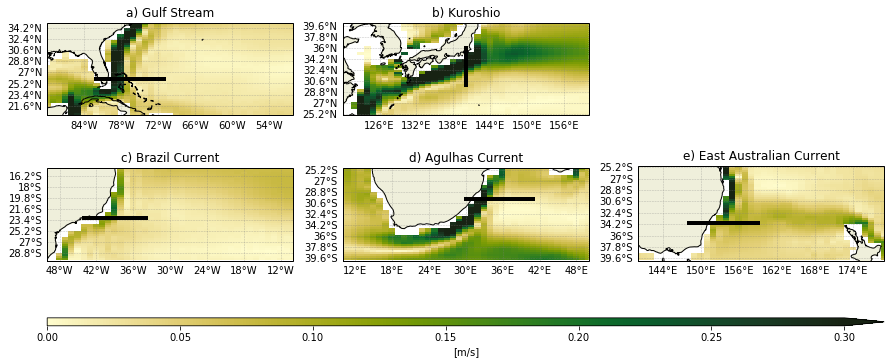

In [4]:
fignum = '04_03'
U = xr.open_mfdataset(datadir+'GODAS/ucur*', combine='by_coords')
V = xr.open_mfdataset(datadir+'GODAS/vcur*', combine='by_coords')
spd = np.hypot(U.ucur.isel(level=0).mean('time'), V.vcur.isel(level=0).mean('time'))

projection = cartopy.crs.PlateCarree()
fig, ax = plt.subplots(2, 3, subplot_kw={'projection': projection}, figsize=(15, 7))
ax[0, 2].remove()
ax = np.delete(ax, 2)

lons = [slice(270, 310), slice(120, 160), slice(310, 350), slice(10, 50), slice(140,179)]
lats = [slice(20, 35), slice(25, 40), slice(-30, -15), slice(-40, -25), slice(-40, -25)]
section_lons = [slice(278, 289), 140, slice(316, 326), slice(30, 41), slice(148, 159)]
section_lats = [26, slice(30, 36), -23, -30, -34]
titles = ['a) Gulf Stream', 'b) Kuroshio', 'c) Brazil Current', 'd) Agulhas Current', 'e) East Australian Current']
for i, ai in enumerate(ax.ravel()):
    ai.coastlines(resolution='50m')
    ai.add_feature(cartopy.feature.LAND)
    a = spd.sel(lon=lons[i], lat=lats[i]).plot(cmap=cmo.speed, vmin=0, vmax=0.3, transform=cartopy.crs.PlateCarree(), 
                                           ax=ai, add_colorbar=False)
    ai.set_title(titles[i])
    if isinstance(section_lons[i], slice):
        linelons, linelats = (section_lons[i].start, section_lons[i].stop), (section_lats[i], section_lats[i])
    else:
        linelons, linelats = (section_lons[i], section_lons[i]), (section_lats[i].start, section_lats[i].stop)
    ai.plot(linelons, linelats, 'k', linewidth=4, transform=cartopy.crs.PlateCarree())
    ai.set_extent([lons[i].start, lons[i].stop, lats[i].start, lats[i].stop], crs=cartopy.crs.PlateCarree())

    gl = ai.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True, linewidth=0.5,
              color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

plt.colorbar(a, ax=ax.ravel().tolist(), orientation="horizontal", aspect=100, extend='max', label='[m/s]')
plt.tight_layout()
savefig(fignum)

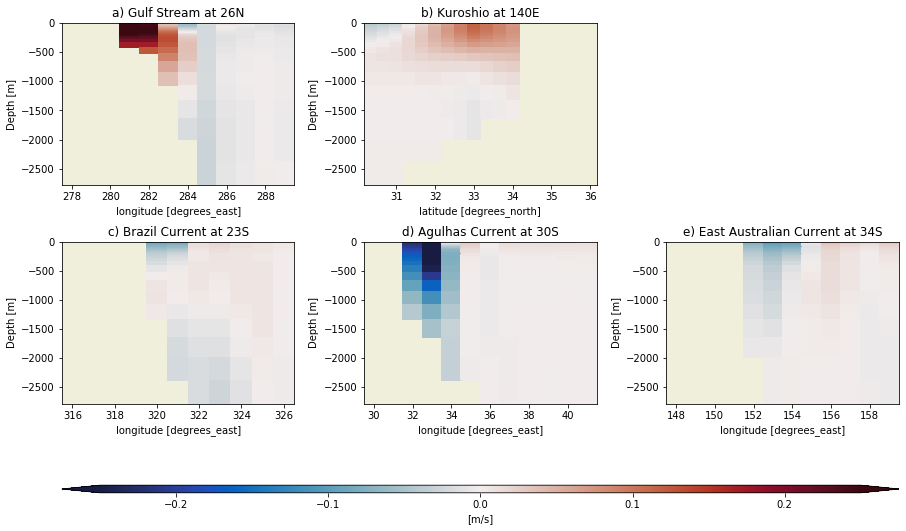

In [5]:
fignum = '04_04'
U = xr.open_mfdataset(datadir+'GODAS/ucur*', combine='by_coords')
V = xr.open_mfdataset(datadir+'GODAS/vcur*', combine='by_coords')

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0, 2].remove()
ax = np.delete(ax, 2)

lons = [slice(278, 289), 140, slice(316, 326), slice(30, 41), slice(148, 159)]
lats = [26, slice(30, 36), -23, -30, -34]
titles = ['a) Gulf Stream at 26N', 'b) Kuroshio at 140E', 'c) Brazil Current at 23S', 'd) Agulhas Current at 30S', 'e) East Australian Current at 34S']
for i, ai in enumerate(ax.ravel()):
    if isinstance(lons[i], slice):
        vel = V.vcur.sel(lat=lats[i], method='nearest').sel(lon=lons[i], level=slice(0, 3000)).mean('time')
        vel = vel.assign_coords(level = (-vel.level))
    else:
        vel = V.vcur.sel(lon=lons[i], method='nearest').sel(lat=lats[i], level=slice(0, 3000)).mean('time')
        vel = vel.assign_coords(level = (-vel.level))
    a = vel.plot(cmap=cmo.balance, ax=ai, add_colorbar=False, vmin=-0.25, vmax=0.25)
    ai.set_title(titles[i])
    ai.set_ylabel('Depth [m]')
    ai.set_facecolor([0.9375 , 0.9375 , 0.859375])

plt.subplots_adjust(hspace=0.35, wspace=0.3)
plt.colorbar(a, ax=ax.ravel().tolist(), orientation="horizontal", aspect=100, extend='both', label='[m/s]')
savefig(fignum)

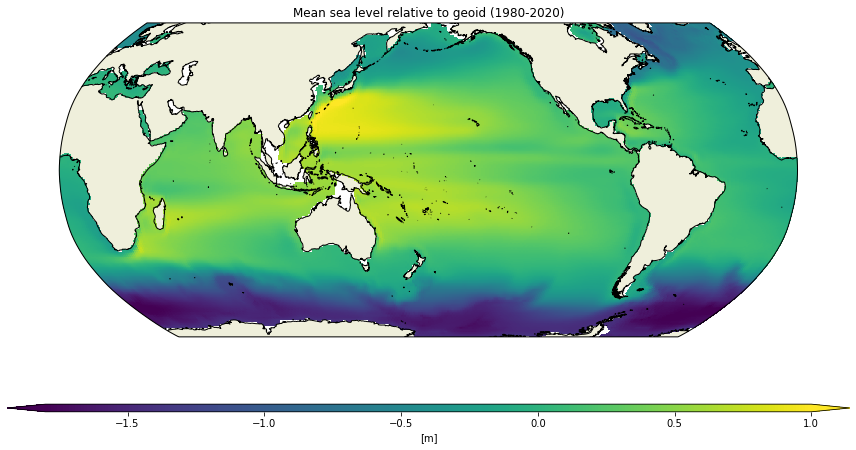

In [6]:
fignum = '04_05'
SSH = xr.open_mfdataset(datadir+'GODAS/ssh*', combine='by_coords')

projection = cartopy.crs.Robinson(central_longitude=180)
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection}, figsize=(12, 7))
ax.coastlines(resolution='50m')
ax.add_feature(cartopy.feature.LAND)

a = SSH.sshg.mean('time').plot(cmap=cm.viridis, vmin=-1.8, vmax=1, add_colorbar=False, 
                               transform=cartopy.crs.PlateCarree())
plt.title('Mean sea level relative to geoid (1980-2020)')

cbar = plt.colorbar(a, ax=ax, orientation="horizontal", aspect=100, extend='both', label='[m]')
plt.tight_layout()
savefig(fignum)

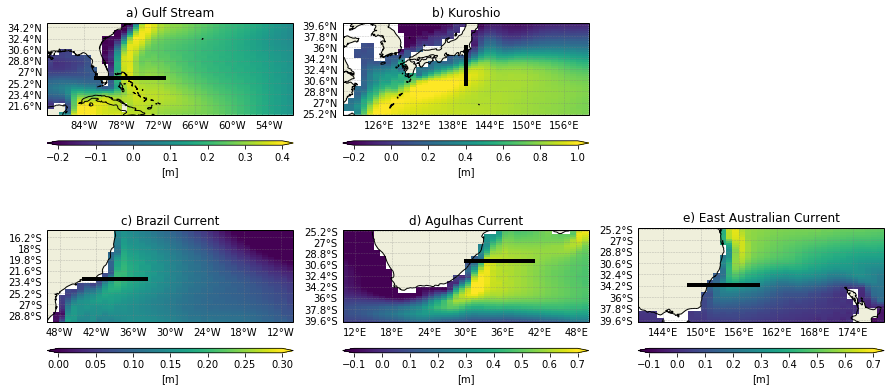

In [7]:
fignum = '04_06'
SSH = xr.open_mfdataset(datadir+'GODAS/ssh*', combine='by_coords')

projection = cartopy.crs.PlateCarree()
fig, ax = plt.subplots(2, 3, subplot_kw={'projection': projection}, figsize=(15, 7))
ax[0, 2].remove()
ax = np.delete(ax, 2)

lons = [slice(270, 310), slice(120, 160), slice(310, 350), slice(10, 50), slice(140,179)]
lats = [slice(20, 35), slice(25, 40), slice(-30, -15), slice(-40, -25), slice(-40, -25)]
section_lons = [slice(278, 289), 140, slice(316, 326), slice(30, 41), slice(148, 159)]
section_lats = [26, slice(30, 36), -23, -30, -34]
vlims = [[-0.2, 0.4], [-0.2, 1], [0, 0.3], [-0.1, 0.7], [-0.1, 0.7]]
titles = ['a) Gulf Stream', 'b) Kuroshio', 'c) Brazil Current', 'd) Agulhas Current', 'e) East Australian Current']
for i, ai in enumerate(ax.ravel()):
    ai.coastlines(resolution='50m')
    ai.add_feature(cartopy.feature.LAND)
    a = SSH.sshg.mean('time').sel(lon=lons[i], lat=lats[i]).plot(cmap=cm.viridis, vmin=vlims[i][0], vmax=vlims[i][1], 
                                                                 transform=cartopy.crs.PlateCarree(), 
                                                                 ax=ai, add_colorbar=False)
    ai.set_title(titles[i])
    if isinstance(section_lons[i], slice):
        linelons, linelats = (section_lons[i].start, section_lons[i].stop), (section_lats[i], section_lats[i])
    else:
        linelons, linelats = (section_lons[i], section_lons[i]), (section_lats[i].start, section_lats[i].stop)
    ai.plot(linelons, linelats, 'k', linewidth=4, transform=cartopy.crs.PlateCarree())
    ai.set_extent([lons[i].start, lons[i].stop, lats[i].start, lats[i].stop], crs=cartopy.crs.PlateCarree())

    gl = ai.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True, linewidth=0.5,
              color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    plt.colorbar(a, ax=ai, orientation="horizontal", aspect=50, extend='both', label='[m]')
plt.tight_layout()
savefig(fignum)

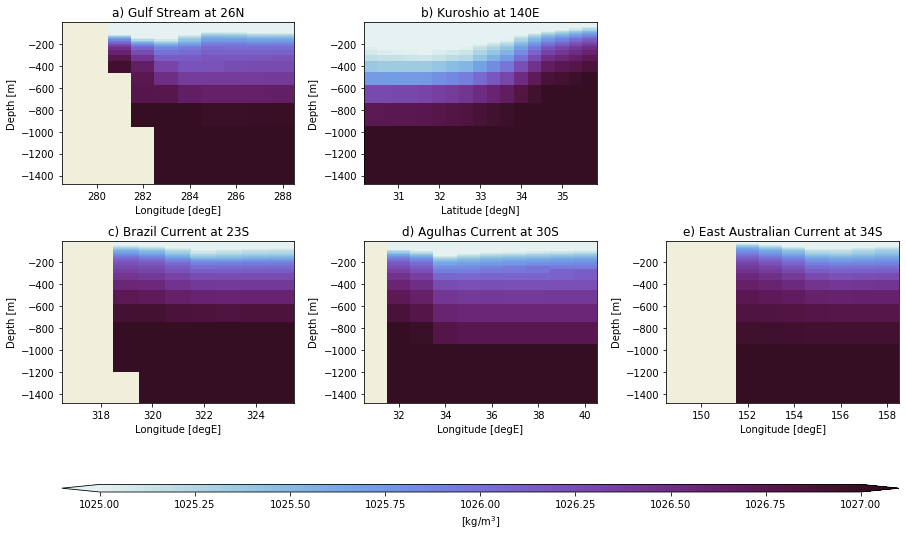

In [8]:
fignum = '04_07'
T = xr.open_mfdataset(datadir+'GODAS/pottmp*', combine='by_coords')
S = xr.open_mfdataset(datadir+'GODAS/salt*', combine='by_coords')
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0, 2].remove()
ax = np.delete(ax, 2)

lons = [slice(278, 289), 140, slice(316, 326), slice(30, 41), slice(148, 159)]
lats = [26, slice(30, 36), -23, -30, -34]
titles = ['a) Gulf Stream at 26N', 'b) Kuroshio at 140E', 'c) Brazil Current at 23S', 'd) Agulhas Current at 30S', 'e) East Australian Current at 34S']
for i, ai in enumerate(ax.ravel()):
    if isinstance(lons[i], slice):
        salt = S.salt.sel(lat=lats[i], method='nearest').sel(lon=lons[i], level=slice(0, 1800)).mean('time')
        temp = T.pottmp.sel(lat=lats[i], method='nearest').sel(lon=lons[i], level=slice(0, 1800)).mean('time')
        x, xlabel = salt.lon, 'Longitude [degE]'
    else:
        salt = S.salt.sel(lon=lons[i], method='nearest').sel(lat=lats[i], level=slice(0, 1800)).mean('time')
        temp = T.pottmp.sel(lon=lons[i], method='nearest').sel(lat=lats[i], level=slice(0, 1800)).mean('time')
        x, xlabel = salt.lat, 'Latitude [degN]'
    dens = gsw.density.sigma0(salt*1000, temp-273.15)+1000
    a = ai.pcolormesh(x, -salt.level, dens, cmap=cmo.dense, vmin=1025, vmax=1027)
    ai.set_title(titles[i])
    ai.set_xlabel(xlabel)
    ai.set_ylabel('Depth [m]')
    ai.set_facecolor([0.9375 , 0.9375 , 0.859375])

plt.subplots_adjust(hspace=0.35, wspace=0.3)
plt.colorbar(a, ax=ax.ravel().tolist(), orientation="horizontal", aspect=100, extend='both', label='[kg/m$^3$]')
savefig(fignum)

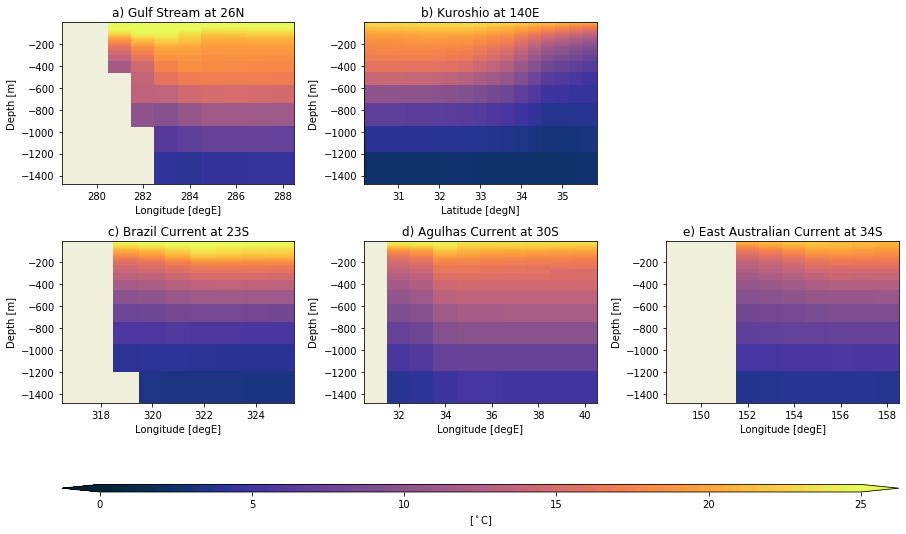

In [9]:
fignum = '04_08'
T = xr.open_mfdataset(datadir+'GODAS/pottmp*', combine='by_coords')
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0, 2].remove()
ax = np.delete(ax, 2)

lons = [slice(278, 289), 140, slice(316, 326), slice(30, 41), slice(148, 159)]
lats = [26, slice(30, 36), -23, -30, -34]
titles = ['a) Gulf Stream at 26N', 'b) Kuroshio at 140E', 'c) Brazil Current at 23S', 'd) Agulhas Current at 30S', 'e) East Australian Current at 34S']
for i, ai in enumerate(ax.ravel()):
    if isinstance(lons[i], slice):
        temp = T.pottmp.sel(lat=lats[i], method='nearest').sel(lon=lons[i], level=slice(0, 1800)).mean('time')
        x, xlabel = temp.lon, 'Longitude [degE]'
    else:
        temp = T.pottmp.sel(lon=lons[i], method='nearest').sel(lat=lats[i], level=slice(0, 1800)).mean('time')
        x, xlabel = temp.lat, 'Latitude [degN]'
    a = ai.pcolormesh(x, -temp.level, temp-273.15, cmap=cmo.thermal, vmin=0, vmax=25)
    ai.set_title(titles[i])
    ai.set_xlabel(xlabel)
    ai.set_ylabel('Depth [m]')
    ai.set_facecolor([0.9375 , 0.9375 , 0.859375])

plt.subplots_adjust(hspace=0.35, wspace=0.3)
plt.colorbar(a, ax=ax.ravel().tolist(), orientation="horizontal", aspect=100, extend='both', label='[$^\circ$C]')
savefig(fignum)

In [10]:
fignum = '04_10'

#TODO

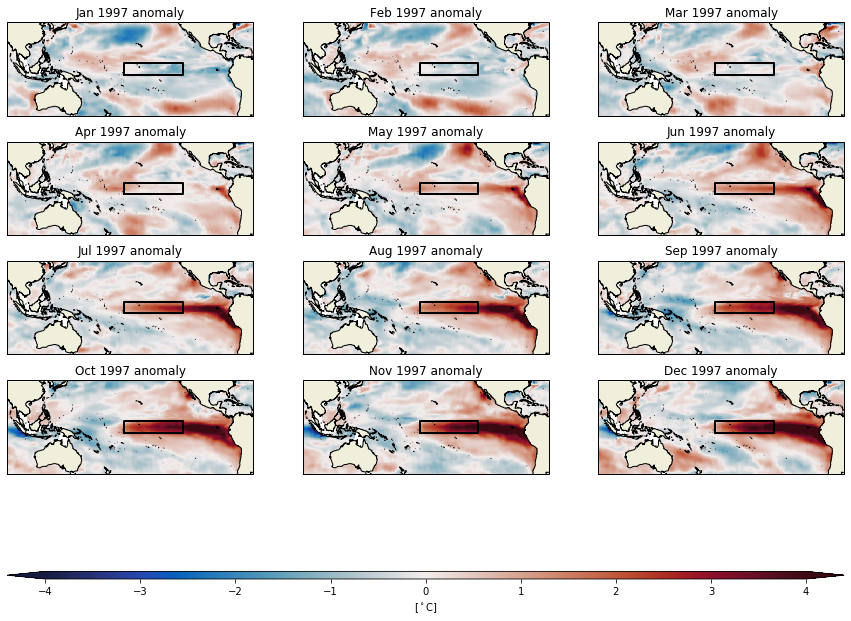

In [11]:
fignum = '06_22'

T = xr.open_mfdataset(datadir+'GODAS/pottmp*', combine='by_coords').pottmp.isel(level=0).sel(lon=slice(90, 300), lat=slice(-40, 40))
climatology = T.groupby("time.month").mean("time")
anomalies = T.groupby("time.month") - climatology

projection = cartopy.crs.PlateCarree(central_longitude=180)
fig, ax = plt.subplots(4, 3, subplot_kw={'projection': projection}, figsize=(15, 12))

for i, ai in enumerate(ax.ravel()):
    ai.coastlines(resolution='50m')
    ai.add_feature(cartopy.feature.LAND)
    temp = anomalies.sel(time='1997-%.2d-01' % (i+1))
    a = temp.plot(cmap=cmo.balance, vmin=-4, vmax=4,
                  transform=cartopy.crs.PlateCarree(), 
                  ax=ai, add_colorbar=False)
    ai.plot([-170, -120, -120, -170, -170], [-5, -5, 5, 5, -5], 'k', linewidth=2, transform=cartopy.crs.PlateCarree())
    ai.set_title('%s anomaly' % temp.time.dt.strftime('%b %Y').values)
    ai.set_extent([90, 300, -40, 40], crs=cartopy.crs.PlateCarree())

plt.colorbar(a, ax=ax.ravel().tolist(), orientation="horizontal", aspect=100, extend='both', label='[$^\circ$C]')
savefig(fignum)

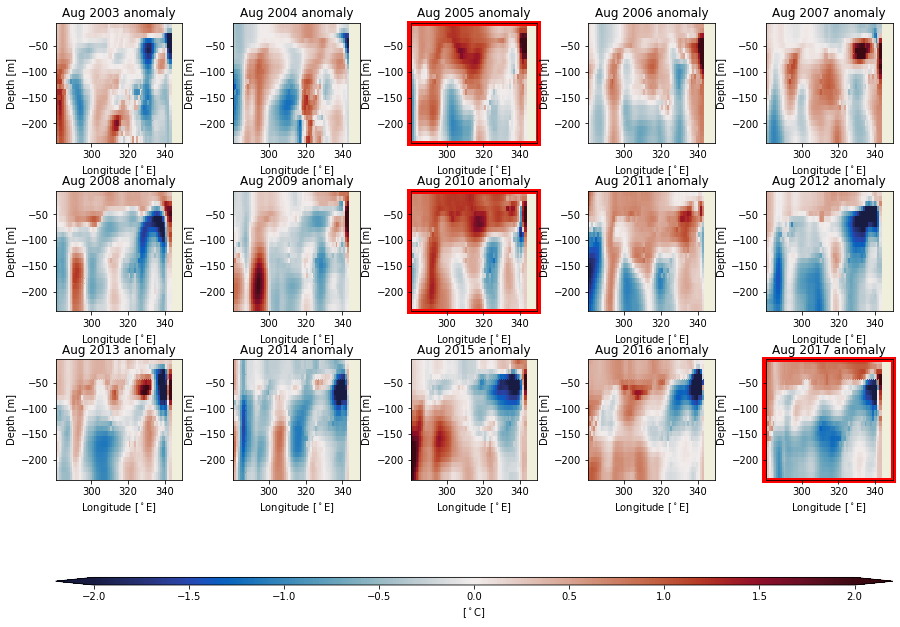

In [12]:
fignum = '06_27'

T = xr.open_mfdataset(datadir+'GODAS/pottmp*', combine='by_coords').pottmp.sel(lat=15, method='nearest').sel(lon=slice(280, 350), level=slice(0, 250))
climatology = T.groupby("time.month").mean("time")
anomalies = T.groupby("time.month") - climatology

fig, ax = plt.subplots(3, 5, figsize=(15, 12))

for i, ai in enumerate(ax.ravel()):
    temp = anomalies.sel(time='%d-08-01' % (i+2003))
    a = ai.pcolormesh(temp.lon, -temp.level, temp, cmap=cmo.balance, vmin=-2, vmax=2)
    ai.set_title('%s anomaly' % temp.time.dt.strftime('%b %Y').values)
    ai.set_xlabel('Longitude [$^\circ$E]')
    ai.set_ylabel('Depth [m]')
    ai.set_facecolor([0.9375 , 0.9375 , 0.859375])
    if i in [2, 7, 14]:
        rec = Rectangle((ai.axis()[0]-0.7, ai.axis()[2]-0.2), 
                        (ai.axis()[1]- ai.axis()[0])+1, (ai.axis()[3]-ai.axis()[2])+0.4,
                        fill=False, lw=5, color='r')
        rec = ai.add_patch(rec)
        rec.set_clip_on(False)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.colorbar(a, ax=ax.ravel().tolist(), orientation="horizontal", aspect=100, extend='both', label='[$^\circ$C]')
savefig(fignum)

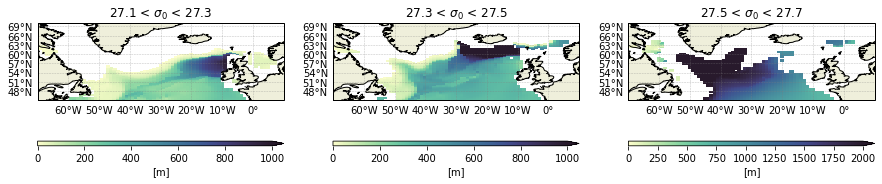

In [13]:
fignum = '07_20'

T = xr.open_mfdataset(datadir+'GODAS/pottmp*', combine='by_coords').pottmp.sel(lat=slice(45, 70)).groupby('time.month').mean("time")
S = xr.open_mfdataset(datadir+'GODAS/salt*', combine='by_coords').salt.sel(lat=slice(45, 70)).groupby('time.month').mean("time")
dens = gsw.density.sigma0(S*1000, T-273.15)

sig0 = [27.1, 27.3, 27.5, 27.7]
vmax = [1000, 1000, 2000]
mon = 3

projection = cartopy.crs.PlateCarree()
fig, ax = plt.subplots(1, 3, subplot_kw={'projection': projection}, figsize=(15, 5))

for i in range(len(sig0)-1):
    pd0, pd1 = sig0[i], sig0[i+1]
    thickness = np.nan * np.ones((dens.shape[2], dens.shape[3]))
    for x in range(thickness.shape[1]):
        for y in range(thickness.shape[0]):
            if dens[mon, 0, y, x] < pd1:
                thickness[y, x] = np.interp(pd1, dens[mon, :, y, x], S.level) - np.interp(pd0, dens[mon, :, y, x], S.level)

    ax[i].coastlines(resolution='50m')
    ax[i].add_feature(cartopy.feature.LAND)
    a = ax[i].pcolormesh(T.lon, T.lat, thickness, cmap=cmo.deep, transform=cartopy.crs.PlateCarree(), vmin=0, vmax=vmax[i])
    ax[i].set_title('%.1f < $\sigma_0$ < %.1f' % (pd0, pd1))
    ax[i].set_extent([-70, 10, 45, 70], crs=cartopy.crs.PlateCarree())
    
    gl = ax[i].gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True, linewidth=0.5,
                         color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    plt.colorbar(a, ax=ax[i], orientation="horizontal", aspect=50, extend='max', label='[m]')
savefig(fignum)

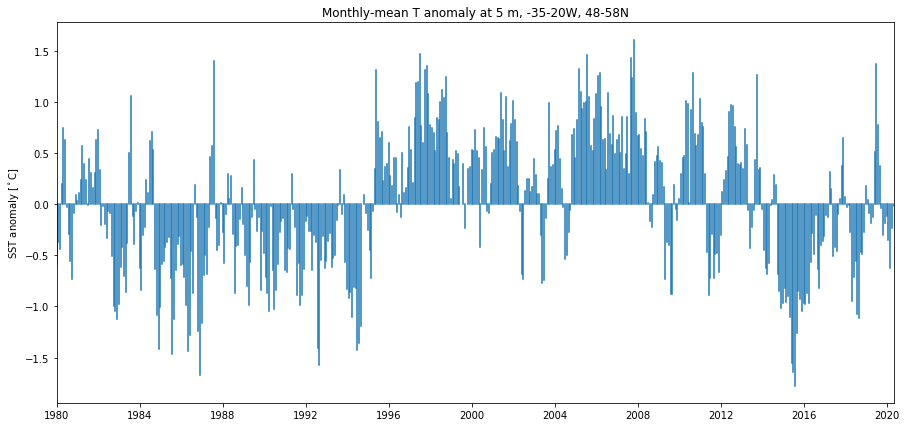

In [14]:
fignum = '07_34'

T = xr.open_mfdataset(datadir+'GODAS/pottmp*', combine='by_coords')
temp = T.pottmp.isel(level=0).sel(lat=slice(48, 58), lon=slice(360-35, 360-20)).mean('lon').mean('lat')

climatology = temp.groupby("time.month").mean("time")
anomalies = temp.groupby("time.month") - climatology

fig, ax = plt.subplots(1, 1, figsize=(15, 7))
plt.stem(temp.time, anomalies, markerfmt=" ", basefmt=" ")
plt.ylabel('SST anomaly [$^\circ$C]')
plt.xlim([temp.time[0].values, temp.time[-1].values])
plt.title('Monthly-mean T anomaly at %d m, -35-20W, 48-58N' % temp.level.values)

savefig(fignum)

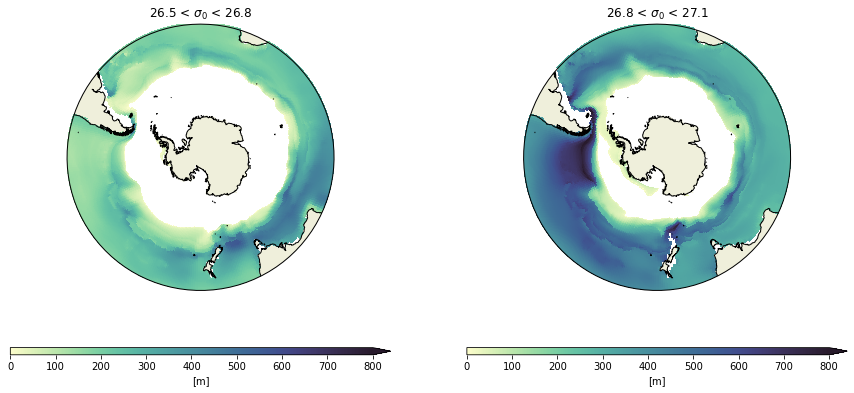

In [15]:
fignum = '08_21'

T = xr.open_mfdataset(datadir+'GODAS/pottmp*', combine='by_coords').pottmp.sel(lat=slice(-90, -30)).groupby('time.month').mean("time")
S = xr.open_mfdataset(datadir+'GODAS/salt*', combine='by_coords').salt.sel(lat=slice(-90, -30)).groupby('time.month').mean("time")
dens = gsw.density.sigma0(S*1000, T-273.15)

sig0 = [26.5, 26.8, 27.1]
mon = 9

projection = cartopy.crs.SouthPolarStereo()
fig, ax = plt.subplots(1, 2, subplot_kw={'projection': projection}, figsize=(15, 7))

for i in range(len(sig0)-1):
    pd0, pd1 = sig0[i], sig0[i+1]
    thickness = np.nan * np.ones((dens.shape[2], dens.shape[3]))
    for x in range(thickness.shape[1]):
        for y in range(thickness.shape[0]):
            if dens[mon, 0, y, x] < pd1:
                thickness[y, x] = np.interp(pd1, dens[mon, :, y, x], S.level) - np.interp(pd0, dens[mon, :, y, x], S.level)

    ax[i].coastlines(resolution='50m')
    ax[i].add_feature(cartopy.feature.LAND)
    a = ax[i].pcolormesh(cartopy.util.add_cyclic_point(T.lon), T.lat, cartopy.util.add_cyclic_point(thickness), 
                         cmap=cmo.deep, transform=cartopy.crs.PlateCarree(), vmin=0, vmax=800)
    ax[i].set_title('%.1f < $\sigma_0$ < %.1f' % (pd0, pd1))
    
    ax[i].set_extent([-180, 180, -90, -30], cartopy.crs.PlateCarree())
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax[i].set_boundary(circle, transform=ax[i].transAxes)

    plt.colorbar(a, ax=ax[i], orientation="horizontal", aspect=50, extend='max', label='[m]')
savefig(fignum)

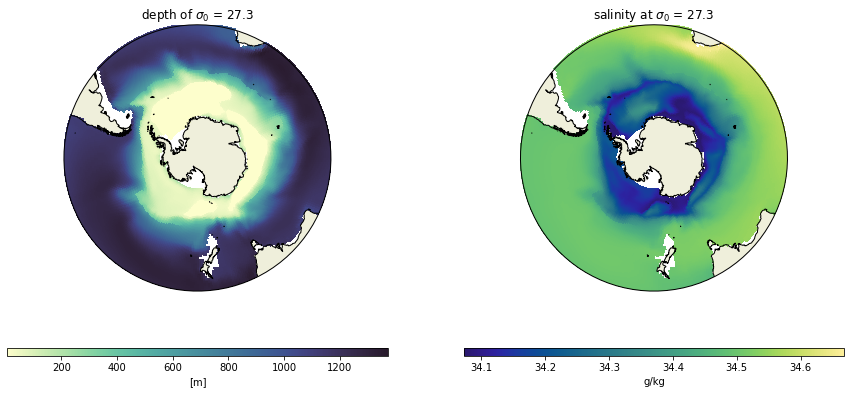

In [16]:
fignum = '08_24'

T = xr.open_mfdataset(datadir+'GODAS/pottmp*', combine='by_coords').pottmp.sel(lat=slice(-90, -30)).groupby('time.month').mean("time")
S = xr.open_mfdataset(datadir+'GODAS/salt*', combine='by_coords').salt.sel(lat=slice(-90, -30)).groupby('time.month').mean("time")
S = S.compute()
dens = gsw.density.sigma0(S*1000, T-273.15)
sig0 = 27.3
mon = 9

depth = np.nan * np.ones((dens.shape[2], dens.shape[3]))
salt = np.nan * np.ones((dens.shape[2], dens.shape[3]))
for x in range(depth.shape[1]):
    for y in range(depth.shape[0]):
        d = np.interp(sig0, dens[mon, :, y, x], T.level)
        depth[y, x] = d
        salt[y, x] = np.interp(d, T.level, S[mon, :, y, x])*1000

projection = cartopy.crs.SouthPolarStereo()
fig, ax = plt.subplots(1, 2, subplot_kw={'projection': projection}, figsize=(15, 7))

for i in range(2):
    ax[i].coastlines(resolution='50m')
    ax[i].add_feature(cartopy.feature.LAND)
    
    if i == 0:
        var = depth
        ax[i].set_title('depth of $\sigma_0$ = %.1f' % sig0)
        unit, cmap  = '[m]', cmo.deep
    else:
        var = salt
        ax[i].set_title('salinity at $\sigma_0$ = %.1f' % sig0)
        unit, cmap = 'g/kg', cmo.haline
    a = ax[i].pcolormesh(cartopy.util.add_cyclic_point(T.lon), T.lat, cartopy.util.add_cyclic_point(var), 
                         cmap=cmap, transform=cartopy.crs.PlateCarree())
    
    ax[i].set_extent([-180, 180, -90, -30], cartopy.crs.PlateCarree())
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax[i].set_boundary(circle, transform=ax[i].transAxes)

    plt.colorbar(a, ax=ax[i], orientation="horizontal", aspect=50, label=unit)
savefig(fignum)

In [17]:
fignum = '08_25'

#TODO: need to find propper neutral density implementation in Python!

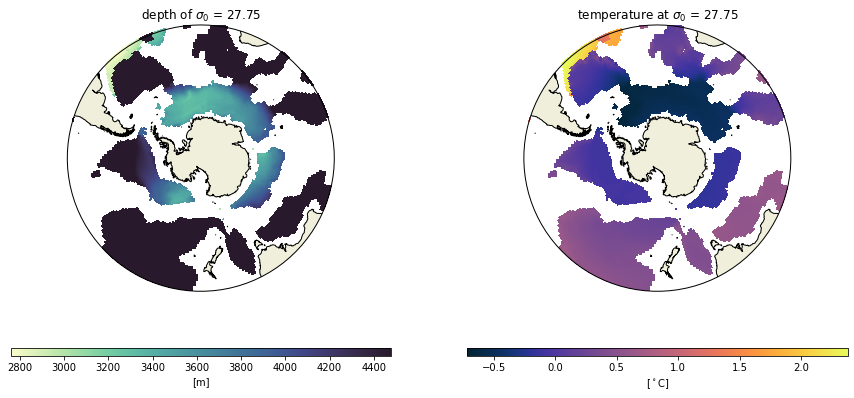

In [18]:
fignum = '08_26'

T = xr.open_mfdataset(datadir+'GODAS/pottmp*', combine='by_coords').pottmp.sel(lat=slice(-90, -30)).groupby('time.month').mean("time")
S = xr.open_mfdataset(datadir+'GODAS/salt*', combine='by_coords').salt.sel(lat=slice(-90, -30)).groupby('time.month').mean("time")
T = T.compute()
dens = gsw.density.sigma0(S*1000, T-273.15)
sig0 = 27.75
mon = 9

depth = np.nan * np.ones((dens.shape[2], dens.shape[3]))
temp = np.nan * np.ones((dens.shape[2], dens.shape[3]))
for x in range(depth.shape[1]):
    for y in range(depth.shape[0]):
        d = np.interp(sig0, dens[mon, :, y, x], S.level)
        depth[y, x] = d
        temp[y, x] = np.interp(d, S.level, T[mon, :, y, x])-273.15

projection = cartopy.crs.SouthPolarStereo()
fig, ax = plt.subplots(1, 2, subplot_kw={'projection': projection}, figsize=(15, 7))

for i in range(2):
    ax[i].coastlines(resolution='50m')
    ax[i].add_feature(cartopy.feature.LAND)
    
    if i == 0:
        var = depth
        ax[i].set_title('depth of $\sigma_0$ = %.2f' % sig0)
        unit, cmap  = '[m]', cmo.deep
    else:
        var = temp
        ax[i].set_title('temperature at $\sigma_0$ = %.2f' % sig0)
        unit, cmap = '[$^\circ$C]', cmo.thermal
    a = ax[i].pcolormesh(cartopy.util.add_cyclic_point(T.lon), T.lat, cartopy.util.add_cyclic_point(var), 
                         cmap=cmap, transform=cartopy.crs.PlateCarree())
    
    ax[i].set_extent([-180, 180, -90, -30], cartopy.crs.PlateCarree())
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax[i].set_boundary(circle, transform=ax[i].transAxes)

    plt.colorbar(a, ax=ax[i], orientation="horizontal", aspect=50, label=unit)
savefig(fignum)

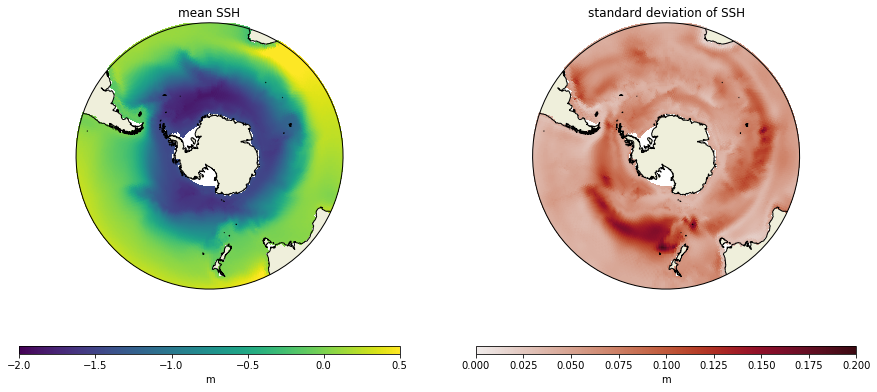

In [19]:
fignum = '08_30'

SSH = xr.open_mfdataset(datadir+'GODAS/ssh*', combine='by_coords').sshg.sel(lat=slice(-90, -30))

projection = cartopy.crs.SouthPolarStereo()
fig, ax = plt.subplots(1, 2, subplot_kw={'projection': projection}, figsize=(15, 7))

for i in range(2):
    ax[i].coastlines(resolution='50m')
    ax[i].add_feature(cartopy.feature.LAND)
    
    if i == 0:
        var, cmap, vrange = SSH.mean('time'), cm.viridis, [-2, 0.5]
        ax[i].set_title('mean SSH')
    else:
        var, cmap, vrange = SSH.std('time'), cmo.amp, [0, 0.2]
        ax[i].set_title('standard deviation of SSH')
    a = ax[i].pcolormesh(cartopy.util.add_cyclic_point(T.lon), T.lat, cartopy.util.add_cyclic_point(var), 
                         cmap=cmap, vmin=vrange[0], vmax=vrange[1], transform=cartopy.crs.PlateCarree())
    
    ax[i].set_extent([-180, 180, -90, -30], cartopy.crs.PlateCarree())
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax[i].set_boundary(circle, transform=ax[i].transAxes)

    plt.colorbar(a, ax=ax[i], orientation="horizontal", aspect=50, label='m')
savefig(fignum)

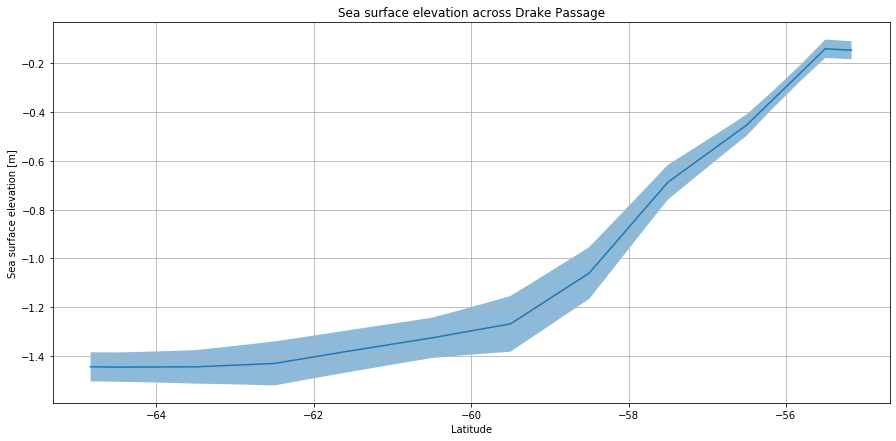

In [20]:
fignum = '08_31'

fig, ax = plt.subplots(1, 1, figsize=(15, 7))

SSH = xr.open_mfdataset(datadir+'GODAS/ssh*', combine='by_coords').sshg.sel(lat=slice(-65, -55)).sel(lon=360-65, method='nearest')

ax.plot(SSH.lat, SSH.mean('time'))
ax.fill_between(SSH.lat, SSH.mean('time')-SSH.std('time'), SSH.mean('time')+SSH.std('time'), alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Sea surface elevation [m]')
plt.title('Sea surface elevation across Drake Passage')
ax.grid()
savefig(fignum)

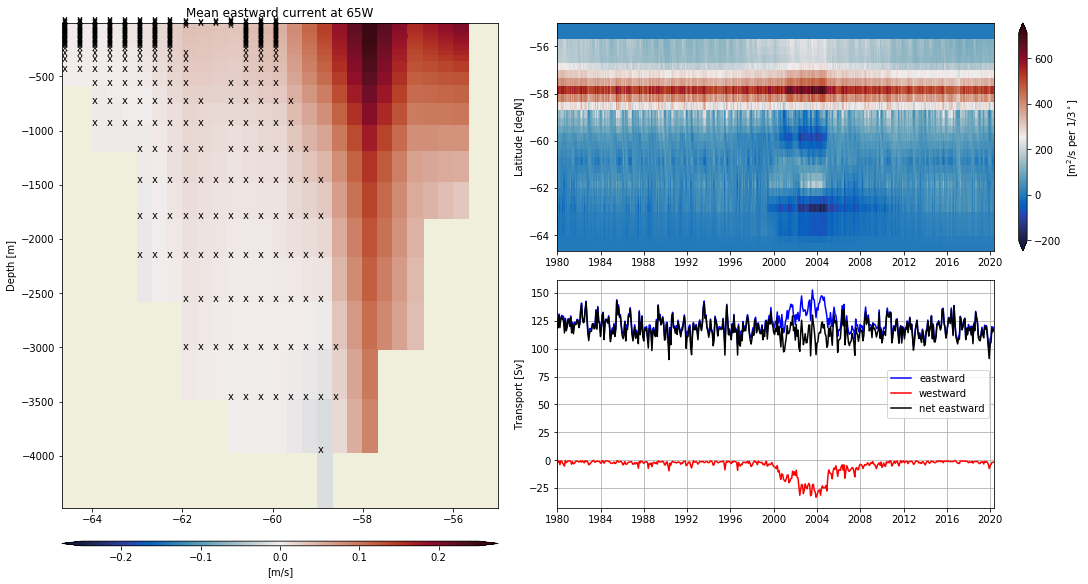

In [21]:
fignum = '08_32'

U = xr.open_mfdataset(datadir+'GODAS/ucur*', combine='by_coords').ucur.sel(lat=slice(-65, -55)).sel(lon=360-65, method='nearest')

fig = plt.figure(constrained_layout=True, figsize=(15, 8))
gs = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(gs[:, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 1])

a = ax0.pcolormesh(U.lat, -U.level, U.mean('time'), cmap=cmo.balance, vmin=-0.25, vmax=0.25)
ax0.set_title('Mean eastward current at 65W')
ax0.set_ylabel('Depth [m]')
ax0.set_facecolor([0.9375 , 0.9375 , 0.859375])
plt.colorbar(a, ax=ax0, orientation="horizontal", aspect=50, extend='both', label='[m/s]')
wward = U.where(U<0).mean('time').values
for z in range(wward.shape[0]):
    for y in range(wward.shape[1]):
        if np.isfinite(wward[z, y]):
            ax0.text(U.lat.values[y], -U.level.values[z],'x', color='k')

a = ax1.pcolormesh(U.time, U.lat, U.fillna(0).integrate('level').T, cmap=cmo.balance)
ax1.set_ylabel('Latitude [degN]')
plt.colorbar(a, ax=ax1, aspect=50, extend='both', label='[m$^2$/s per 1/3$^\circ$]')

ax2.plot(U.time, U.where(U>0).fillna(0).integrate('level').integrate('lat')*1852*60/1e6, 'b', label='eastward')
ax2.plot(U.time, U.where(U<0).fillna(0).integrate('level').integrate('lat')*1852*60/1e6, 'r', label='westward')
ax2.plot(U.time, U.fillna(0).integrate('level').integrate('lat')*1852*60/1e6, 'k', label='net eastward')
ax2.set_ylabel('Transport [Sv]')
ax2.set_xlim([U.time.values[0], U.time.values[-1]])
ax2.legend()
ax2.grid()

savefig(fignum)

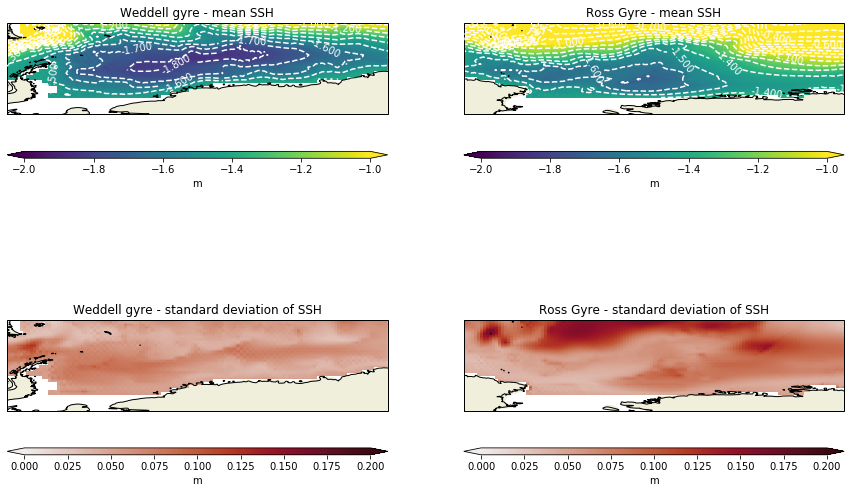

In [22]:
fignum = '08_34'

SSH = xr.open_mfdataset(datadir+'GODAS/ssh*', combine='by_coords').sshg.sel(lat=slice(-90, -50))

projection = cartopy.crs.PlateCarree(central_longitude=360-150)
fig, ax = plt.subplots(2, 2, subplot_kw={'projection': projection}, figsize=(15, 10))

ax[0, 0] = plt.subplot(221, projection = cartopy.crs.PlateCarree(central_longitude=-7.5))
ax[0, 1] = plt.subplot(222, projection = cartopy.crs.PlateCarree(central_longitude=212.5))
ax[1, 0] = plt.subplot(223, projection = cartopy.crs.PlateCarree(central_longitude=-7.5))
ax[1, 1] = plt.subplot(224, projection = cartopy.crs.PlateCarree(central_longitude=212.5))
for j in range(2):
    for i in range(2):
        ax[i, j].coastlines(resolution='50m')
        ax[i, j].add_feature(cartopy.feature.LAND)

        if j == 0:
            ax[i, j].set_extent([-70, 55, -80, -50], cartopy.crs.PlateCarree())
            reg = 'Weddell gyre'
        else:
            ax[i, j].set_extent([150, 360-85, -80, -50], cartopy.crs.PlateCarree())
            reg = 'Ross Gyre'

        if i == 0:
            var, cmap, vrange = SSH.mean('time'), cm.viridis, [-2, -1]
            ax[i, j].set_title('%s - mean SSH' % reg)
        else:
            var, cmap, vrange = SSH.std('time'), cmo.amp, [0, 0.2]
            ax[i, j].set_title('%s - standard deviation of SSH' % reg)
        a = ax[i, j].pcolormesh(cartopy.util.add_cyclic_point(SSH.lon), SSH.lat, cartopy.util.add_cyclic_point(var), 
                             cmap=cmap, vmin=vrange[0], vmax=vrange[1], transform=cartopy.crs.PlateCarree())
        if i == 0:
            CS = ax[i, j].contour(SSH.lon, SSH.lat, var, 
                             levels=np.arange(-2, 0, 0.1), colors='w', transform=cartopy.crs.PlateCarree())
            ax[i, j].clabel(CS, inline=1, fontsize=10)
        plt.colorbar(a, ax=ax[i, j], orientation="horizontal", aspect=50, label='m', extend="both")
savefig(fignum)

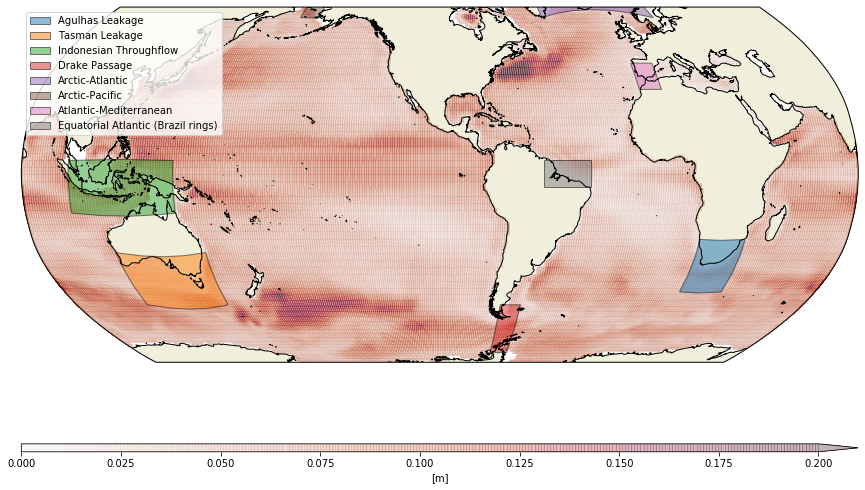

In [23]:
fignum = '10_03'

eke = xr.open_mfdataset(datadir+'GODAS/ssh*', combine='by_coords').sshg.std('time')

projection = cartopy.crs.Robinson(central_longitude=-100)
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection}, figsize=(15, 10))
ax.coastlines(resolution='50m')
ax.add_feature(cartopy.feature.LAND)

a = ax.pcolormesh(cartopy.util.add_cyclic_point(eke.lon), eke.lat, cartopy.util.add_cyclic_point(eke), 
                  cmap=cmo.amp, alpha=0.3, transform=cartopy.crs.PlateCarree(), vmin=0, vmax=0.2)

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

recs = {'Agulhas Leakage': (15, -45, 20, 20, colors[0]),
        'Tasman Leakage': (115, -50, 40, 20, colors[1]),
        'Indonesian Throughflow': (100, -15, 45, 20, colors[2]),
        'Drake Passage': (-70, -70, 10, 20, colors[3]),
        'Arctic-Atlantic': (-45, 60, 60, 10, colors[4]),
        'Arctic-Pacific': (-175, 60, 10, 10, colors[5]),
        'Atlantic-Mediterranean': (-10, 32, 10, 10, colors[6]),
        'Equatorial Atlantic (Brazil rings)': (-55, -5, 20, 10, colors[7])
        }

for key, v in recs.items():
    ax.add_patch(mpatches.Rectangle(xy=[v[0], v[1]], width=v[2], height=v[3], label=key,
                                    facecolor=v[4], alpha=0.5, linewidth=1,
                                    edgecolor='k', transform=cartopy.crs.Geodetic()))

cb = plt.colorbar(a, orientation="horizontal", aspect=100, extend='max', label='[m]')  
ax.legend()
savefig(fignum)

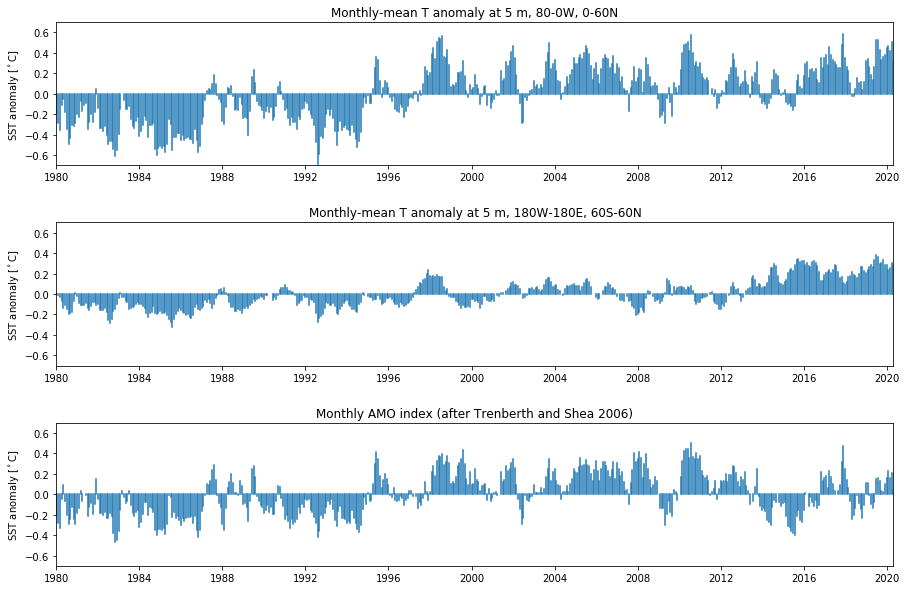

In [24]:
fignum = '11_24'
fig, ax = plt.subplots(3, 1, figsize=(15, 10))

T = xr.open_mfdataset(datadir+'GODAS/pottmp*', combine='by_coords')

temp = T.pottmp.isel(level=0).sel(lat=slice(0, 60), lon=slice(360-80, 360)).mean('lon').mean('lat')
climatology = temp.groupby("time.month").mean("time")
anomalies0 = temp.groupby("time.month") - climatology

ax[0].stem(temp.time, anomalies0, markerfmt=" ", basefmt=" ")
ax[0].set_ylabel('SST anomaly [$^\circ$C]')
ax[0].set_xlim([temp.time[0].values, temp.time[-1].values])
ax[0].set_ylim([-0.7, 0.7])
ax[0].set_title('Monthly-mean T anomaly at %d m, 80-0W, 0-60N' % temp.level.values)

temp = T.pottmp.isel(level=0).sel(lat=slice(-60, 60)).mean('lon').mean('lat')
climatology = temp.groupby("time.month").mean("time")
anomalies1 = temp.groupby("time.month") - climatology

ax[1].stem(temp.time, anomalies1, markerfmt=" ", basefmt=" ")
ax[1].set_ylabel('SST anomaly [$^\circ$C]')
ax[1].set_xlim([temp.time[0].values, temp.time[-1].values])
ax[1].set_ylim([-0.7, 0.7])
ax[1].set_title('Monthly-mean T anomaly at %d m, 180W-180E, 60S-60N' % temp.level.values)

ax[2].stem(temp.time, anomalies0-anomalies1, markerfmt=" ", basefmt=" ")
ax[2].set_ylabel('SST anomaly [$^\circ$C]')
ax[2].set_xlim([temp.time[0].values, temp.time[-1].values])
ax[2].set_ylim([-0.7, 0.7])
ax[2].set_title('Monthly AMO index (after Trenberth and Shea 2006)')

plt.subplots_adjust(hspace=0.4)
savefig(fignum)

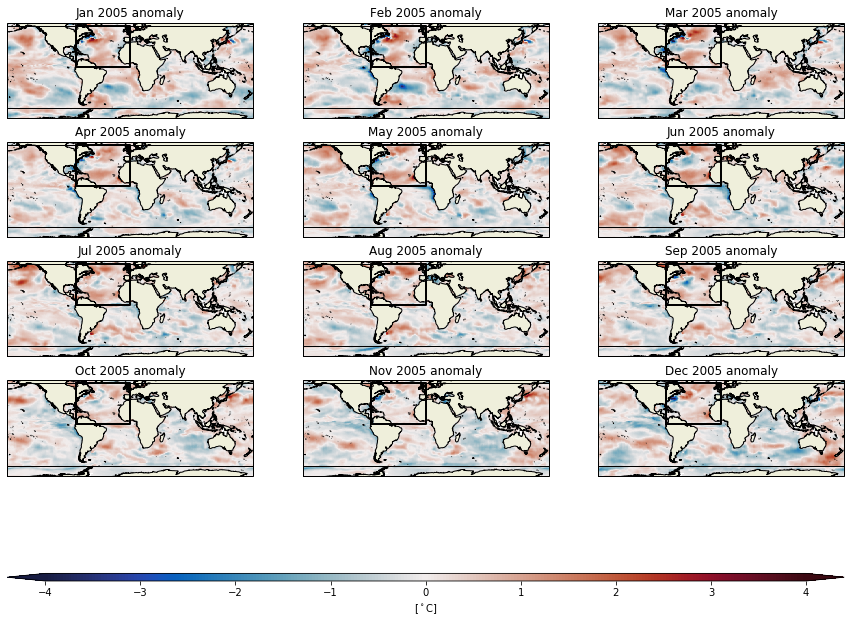

In [25]:
fignum = '11_25'

T = xr.open_mfdataset(datadir+'GODAS/pottmp*', combine='by_coords').pottmp.isel(level=0)
climatology = T.groupby("time.month").mean("time")
anomalies = T.groupby("time.month") - climatology

projection = cartopy.crs.PlateCarree(central_longitude=0)
fig, ax = plt.subplots(4, 3, subplot_kw={'projection': projection}, figsize=(15, 12))

for i, ai in enumerate(ax.ravel()):
    ai.coastlines(resolution='50m')
    ai.add_feature(cartopy.feature.LAND)
    temp = anomalies.sel(time='2005-%.2d-01' % (i+1))
    a = temp.plot(cmap=cmo.balance, vmin=-4, vmax=4,
                  transform=cartopy.crs.PlateCarree(), 
                  ax=ai, add_colorbar=False)
    ai.plot([-80, 0, 0, -80, -80], [0, 0, 60, 60, 0], 'k', linewidth=2, transform=cartopy.crs.PlateCarree())
    ai.plot([-180, 180, 180, -180, -180], [-60, -60, 60, 60, -60], 'k', linewidth=1, transform=cartopy.crs.PlateCarree())
    ai.set_title('%s anomaly' % temp.time.dt.strftime('%b %Y').values)

plt.colorbar(a, ax=ax.ravel().tolist(), orientation="horizontal", aspect=100, extend='both', label='[$^\circ$C]')
savefig(fignum)